In [1]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly
!pip install selenium
!pip install html5lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 102.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 21.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138888 sha256=696deea98ceab560b360850ca1979abe12b47c75720593bfe10aaa9b28ea05fd
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/dd/16/8f/bdde4dfda69996dc9e226111ccfd4a4d247cb61b42a237c3cc
Successfully built peewee
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninst

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import html5lib

In [60]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [61]:
tesla_data = tesla.history(period = "max")

In [85]:
import yfinance as yf
tesla = yf.Ticker('TSLA')

In [86]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data  = requests.get(url).text

In [87]:
soup=BeautifulSoup(html_data, 'html5lib')

In [88]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table = soup.find_all('table', attrs={'class': 'historical_data_table table'})

for result in table:
    if result.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in result.find_all('tbody'):
            for col in row.find_all('tr'):
                #print(col)
                items = col.text.split('$')
                items1=[i.strip('\n') for i in items]
                #print(items1)
                if len(items1) ==2:
                    
                    Date=items1[0]
                    Revenue = '$'+items1[1]
                    tesla_revenue = tesla_revenue.append({"Date":Date,  "Revenue":Revenue}, ignore_index=True)



pd.to_datetime(tesla_revenue['Date'])
pd.to_numeric(tesla_revenue['Revenue'],errors='coerce')

tesla_revenue = tesla_revenue.dropna()
tesla_revenue

,Date,Revenue


In [42]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [43]:
tesla_revenue.dropna(inplace=True)

In [44]:
tesla_revenue.tail()

,Date,Revenue


In [45]:
GameStop = yf.Ticker("GME")

In [46]:
gme_data = GameStop.history(period="max")

In [89]:
gme_data.reset_index(inplace=True)
gme_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [94]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

html_data  = requests.get(url).text

In [95]:
soup = BeautifulSoup(html_data,"html5lib")

In [96]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [97]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [92]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [93]:
make_graph(tesla_data, tesla_revenue, "Tesla")

AttributeError: 'DataFrame' object has no attribute 'Date'

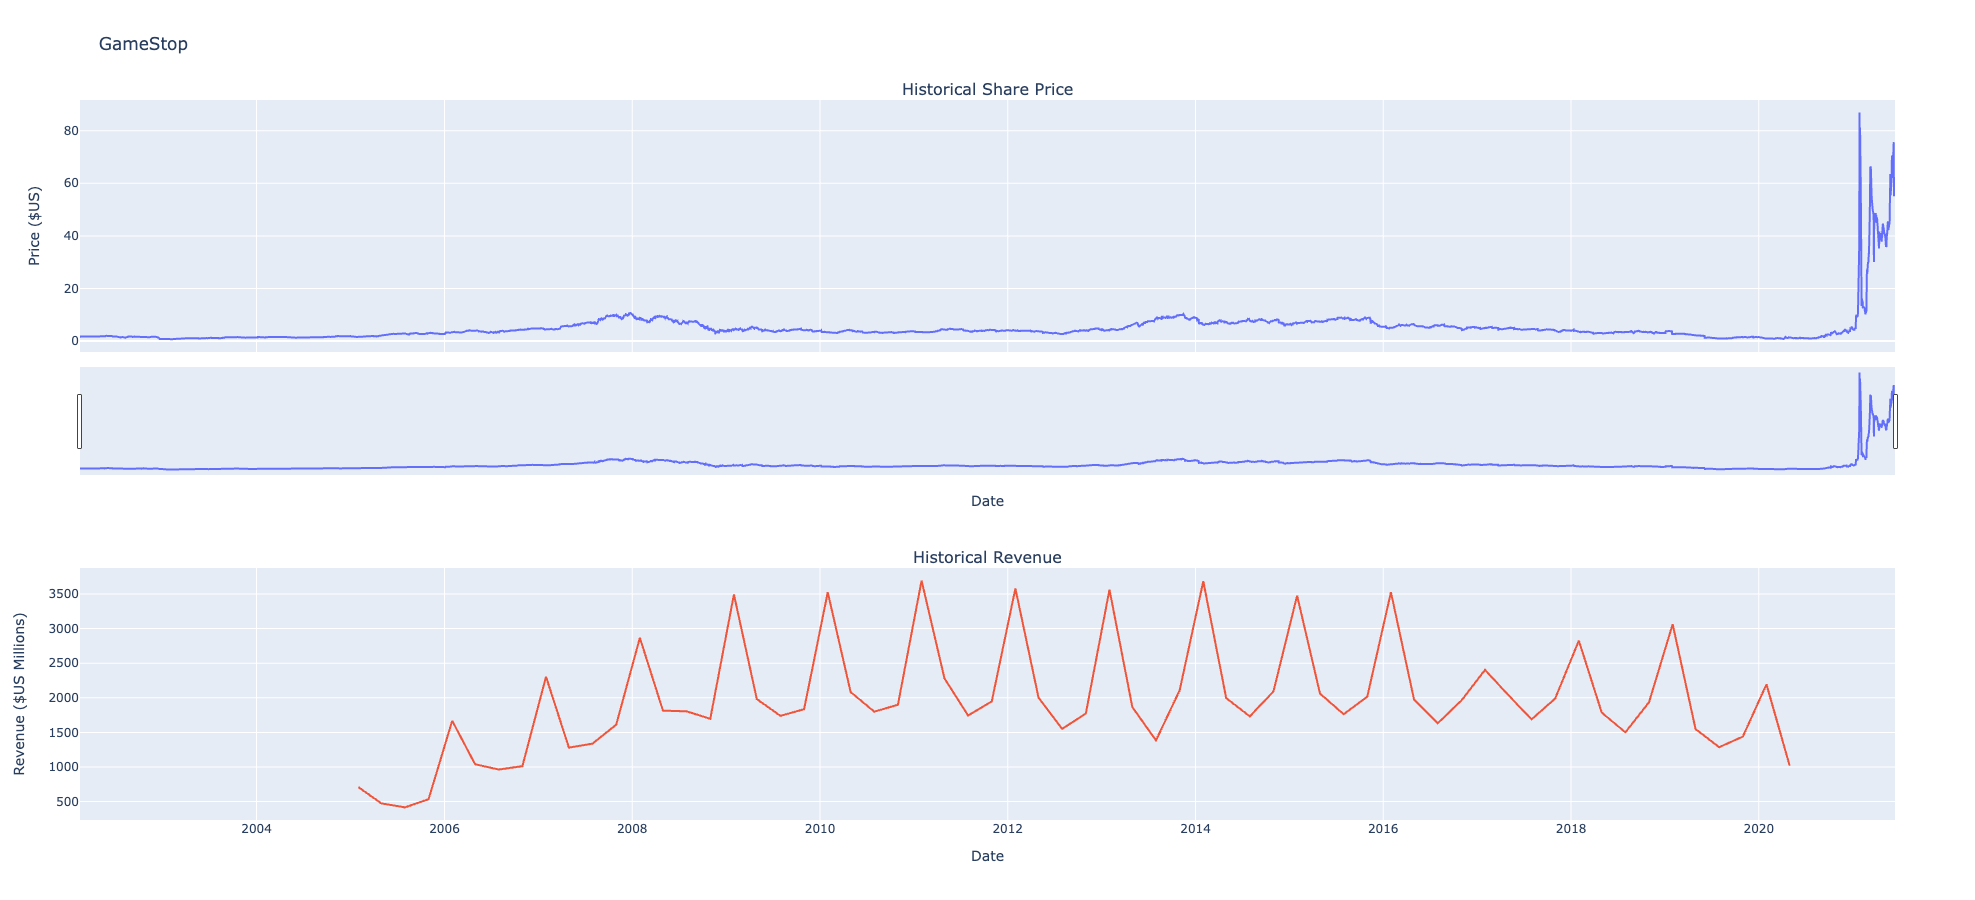

In [102]:
make_graph(gme_data, gme_revenue, 'GameStop')